# "Predict whether an applicant is eligible for a loan "

In [8]:
import os
import numpy as np
import pandas as pd

## Load dataset and preview
The cell below reads `Loan Eligibility Prediction.csv` into a pandas DataFrame and shows the first few rows.

In [9]:
# Load the CSV (file is in the notebook directory)
csv_path = 'Loan Eligibility Prediction.csv'
df = pd.read_csv(csv_path)
print('DataFrame shape:', df.shape)
df.head()

DataFrame shape: (614, 13)


,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


## Dataset summary and descriptive statistics
The cell below prints basic information about the DataFrame, numeric summaries, an `include='all'` summary, missing-value counts, and value counts for common categorical columns.

In [10]:
# Summary and descriptive statistics
print('Shape:', df.shape)
print('\nInfo:')
# df.info() writes to stdout; show it directly
df.info()

print('\nNumeric summary (describe):')
display(df.describe())

print('\nAll-columns summary (describe include=all):')
display(df.describe(include='all'))

print('\nMissing values per column:')
print(df.isnull().sum())

# Show value counts for common categorical columns if present
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for c in cat_cols:
    if c in df.columns:
        print(f"\nValue counts for {c}:")
        print(df[c].value_counts(dropna=False))

Shape: (614, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB

Numeric summary (describe):


,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000



All-columns summary (describe include=all):


,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614,614,614.000000,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,NaN,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,NaN,499,399,NaN,480,523,NaN,NaN,NaN,NaN,NaN,233,422
mean,307.500000,NaN,NaN,0.856678,NaN,NaN,5403.459283,1621.245798,142.022801,338.892508,0.850163,NaN,NaN
std,177.390811,NaN,NaN,1.216651,NaN,NaN,6109.041673,2926.248369,87.083089,69.716355,0.357203,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,154.250000,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,98.000000,360.000000,1.000000,NaN,NaN
50%,307.500000,NaN,NaN,0.000000,NaN,NaN,3812.500000,1188.500000,125.000000,360.000000,1.000000,NaN,NaN
75%,460.750000,NaN,NaN,2.000000,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN



Missing values per column:
Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Value counts for Gender:
Gender
Male      499
Female    115
Name: count, dtype: int64

Value counts for Married:
Married
Yes    399
No     215
Name: count, dtype: int64

Value counts for Dependents:
Dependents
0    351
2    110
1    102
4     51
Name: count, dtype: int64

Value counts for Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Value counts for Self_Employed:
Self_Employed
No     523
Yes     91
Name: count, dtype: int64

Value counts for Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Value counts for Loan_Status:
Loan_Status
Y    42

# Find percentage of grad to no-grad and loan status = yes

In [11]:
# Find percentage of grad to no-grad combined with loan status = yes
if 'Education' in df.columns and 'Loan_Status' in df.columns:
    grad = df[df['Education'].isin(['Graduate'])]
    loan_yes = grad['Loan_Status'] == 'N'
    percentage = (loan_yes.sum() / len(grad)) * 100
    print(f"\nPercentage of Graduate with Loan Status 'N': {percentage:.2f}%")


Percentage of Graduate with Loan Status 'N': 29.17%


In [12]:
# Find percentage of grad to no-grad combined with loan status = yes
if 'Education' in df.columns and 'Loan_Status' in df.columns:
    grad = df[df['Education'].isin(['Not Graduate'])]
    loan_yes = grad['Loan_Status'] == 'N'
    percentage = (loan_yes.sum() / len(grad)) * 100
    print(f"\nPercentage of Not Graduate with Loan Status 'N': {percentage:.2f}%")


Percentage of Not Graduate with Loan Status 'N': 38.81%


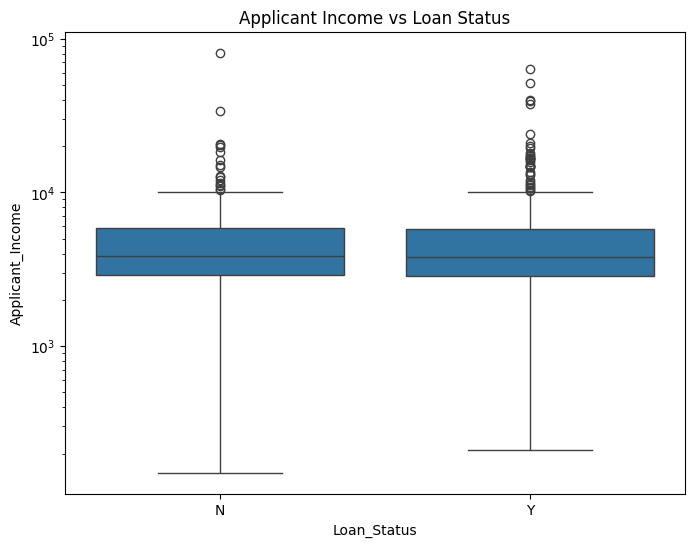

In [19]:
# Plot income level vs loan status if 'ApplicantIncome' in df.columns and 'Loan_Status' in df.columns:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
    
plt.figure(figsize=(8,6))
sns.boxplot(x='Loan_Status', y='Applicant_Income', data=df)
plt.title('Applicant Income vs Loan Status')
plt.yscale('log')  # Log scale for better visibility
plt.show()